# 1. Προετοιμασία δεδομένων

#### 1.0 Import τα απατούμενα packages της Python

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd

import re

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colormaps

import torch

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, silhouette_score, davies_bouldin_score, calinski_harabasz_score, confusion_matrix, roc_curve, auc, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, HDBSCAN, AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.utils import resample
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# from tqdm.notebook import tqdm

from collections import Counter

from neural_network_classifier import OscarClassificationNeuralNetwork, accuracy_fn

from plotting_functions import plot_roc_curves, plot_classification_reports_averages, plot_confusion_matrices
# from google.colab import drive
# drive.mount('/content/drive')
import pickle

# 5. Μοντέλα προβλέψεων - τεχνικές αντιμετώπισης ανισόρροπων δεδομένων

https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/#h-3-smote

In [2]:
# df_un_cl.to_csv('./cleaned_dataframe_unknown.csv', index=False)
# df_cl.to_csv('./cleaned_dataframe_train.csv', index=False)

In [3]:
df_un_cl = pd.read_csv('./cleaned_dataframe_unknown.csv')
df_cl = pd.read_csv('./cleaned_dataframe_train.csv')
df_un_orig = pd.read_excel('movies_test_anon.xlsx')

## 5.1 Νευρωνικό δίκτυο

In [4]:
# remove unecessesary features from dataset
# df_nn = df_cl.drop(['film','year','opening_weekend', 'domestic_gross', 'foreign_gross', 'worldwide_gross', 'rotten_tomatoes_vs_metacritic_deviance', 
#                     'audience_vs_critics_deviance', 'worldwide_gross_($million)', 'of_gross_earned_abroad', 'average_audience', 'average_critics', 
#                     'budget_recovered', 'budget_recovered_opening_weekend', 'distributor','imdb_rating','imdb_vs_rt_disparity','release_date_(us)',
#                     'oscar_detail','PC1','PC2','kmeans_pca','kmeans','dbscan','agg'], axis=1)

# df_nn = df_cl.drop(['film','year','opening_weekend', 'domestic_gross', 'foreign_gross', 'worldwide_gross', 'rotten_tomatoes_vs_metacritic_deviance', 
#                     'audience_vs_critics_deviance', 'worldwide_gross_($million)', 'of_gross_earned_abroad', 'average_audience', 'average_critics', 
#                     'budget_recovered', 'budget_recovered_opening_weekend', 'distributor','imdb_rating','imdb_vs_rt_disparity','release_date_(us)',
#                     'oscar_detail'], axis=1)

# # Separate testing split from dataset
# df_nn_train, df_nn_test = train_test_split(df_nn, test_size=0.2, stratify=df_nn['oscar_winners'])

# # Separate classes
# df_nn_majority = df_nn_train[(df_nn_train['oscar_winners']==0)].reset_index().drop('index', axis=1)
# df_nn_minority = df_nn_train[(df_nn_train['oscar_winners']==1)].reset_index().drop('index', axis=1)

### 5.1.1 Upsampling

In [5]:
# df_nn_minority_upsampled = resample(df_nn_minority, replace=True, n_samples= len(df_nn_majority), random_state=42)

# df_nn_minority_upsampled = df_nn_minority_upsampled.reset_index().drop('index', axis=1)

# df_nn_upsampled = pd.concat([df_nn_minority_upsampled, df_nn_majority]).sort_index(kind='merge')
# df_nn_upsampled = df_nn_upsampled.reset_index().drop('index', axis=1)

#### Εκπαίδευση μοντέλου

In [6]:
# # Prepare dataset for training k-fold splits
# X = df_nn_upsampled.drop(['oscar_winners'], axis=1)
# y = df_nn_upsampled[['oscar_winners']]

# # Create k-fold splits and stratify classes
# kf = StratifiedKFold(n_splits=5, shuffle=False)

# reports_ups_nn = []
# for i, (train_idx, valid_idx) in enumerate(kf.split(X, y), 1):

#     train, validate = df_nn_upsampled.iloc[train_idx], df_nn_upsampled.iloc[valid_idx]
#     # separate labels and convert to tensor
#     X_train, y_train = torch.tensor(train.drop(['oscar_winners'], axis=1).values, dtype=torch.float32), torch.tensor(train[['oscar_winners']].values, cnbype=torch.float32) 
#     X_valid, y_valid = torch.tensor(validate.drop(['oscar_winners'], axis=1).values, cnbype=torch.float32), torch.tensor(validate[['oscar_winners']].values, dtype=torch.float32)

#     nn_input_features = X_train.shape[1]

#     model = OscarClassificationNeuralNetwork(input_features=nn_input_features, 
#                                                 hidden_layer_input_features = nn_input_features,
#                                                 hidden_layer_output_features = nn_input_features,
#                                                 device='cpu',                                               
#                                                 learning_rate=0.01)
    
#     train_progress = model.fit(accuracy_fn, X_train, y_train, X_valid, y_valid, epochs=100, seed=None, verbose=False)
    
#     # Test on test split
#     X_test, y_test = torch.tensor(df_nn_test.drop(['oscar_winners'], axis=1).values, dtype=torch.float32), torch.tensor(df_nn_test[['oscar_winners']].values, dtype=torch.float32)
#     y_pred, acc = model.test(accuracy_fn, X_test, y_test)

#     print(f"Fold {i} test accuracy: {acc:.4f}")



#     report = classification_report(y_test, torch.round(torch.sigmoid(y_pred)), output_dict=True, zero_division=0.0)
#     reports_ups_nn.append({'label' : 'Upsampling',
#                             'report': report,
#                             'true' : y_test.to('cpu').numpy(),
#                             'preds' : y_pred.to('cpu').numpy(),
#                             'dict' : model.state_dict()})

# best_performing_ups_nn_model = max(reports_ups_nn, key=lambda a:a['report']['1.0']['f1-score'])
# best_performing_ups_nn_model['true'] = best_performing_ups_nn_model['true'].flatten()
# best_performing_ups_nn_model['preds'] = best_performing_ups_nn_model['preds'].flatten()

### 5.1.2 Downsampling

In [7]:
# df_nn_majority_downsampled = resample(df_nn_majority, replace=True, n_samples= len(df_nn_minority), random_state=42)

# df_nn_majority_downsampled = df_nn_majority_downsampled.reset_index().drop('index', axis=1)

# df_nn_downsampled = pd.concat([df_nn_majority_downsampled, df_nn_minority]).sort_index(kind='merge')
# df_nn_downsampled = df_nn_downsampled.reset_index().drop('index', axis=1)

#### Εκπαίδευση μοντέλου

In [8]:
# # Prepare dataset for training k-fold splits
# X = df_nn_downsampled.drop(['oscar_winners'], axis=1)
# y = df_nn_downsampled[['oscar_winners']]

# # Create k-fold splits and stratify classes
# kf = StratifiedKFold(n_splits=5, shuffle=False)

# reports_dwn_nn = []
# for i, (train_idx, valid_idx) in enumerate(kf.split(X, y), 1):

#     train, validate = df_nn_downsampled.iloc[train_idx], df_nn_downsampled.iloc[valid_idx]
#     # separate labels and convert to tensor
#     X_train, y_train = torch.tensor(train.drop(['oscar_winners'], axis=1).values, dtype=torch.float32), torch.tensor(train[['oscar_winners']].values, dtype=torch.float32) 
#     X_valid, y_valid = torch.tensor(validate.drop(['oscar_winners'], axis=1).values, dtype=torch.float32), torch.tensor(validate[['oscar_winners']].values, dtype=torch.float32)

#     model = OscarClassificationNeuralNetwork(input_features=X_train.shape[1], 
#                                                 hidden_layer_input_features = X_train.shape[1],
#                                                 hidden_layer_output_features = X_train.shape[1],
#                                                 device='cpu',                                               
#                                                 learning_rate=0.01)
    
#     train_progress = model.fit(accuracy_fn, X_train, y_train, X_valid, y_valid, epochs=100, seed=None, verbose=False)
    
#     # Test on test split
#     X_test, y_test = torch.tensor(df_nn_test.drop(['oscar_winners'], axis=1).values, dtype=torch.float32), torch.tensor(df_nn_test[['oscar_winners']].values, dtype=torch.float32)
#     y_pred, acc = model.test(accuracy_fn, X_test, y_test)

#     print(f"Fold {i} test accuracy: {acc:.4f}")

#     report = classification_report(y_test, torch.round(torch.sigmoid(y_pred)), output_dict=True, zero_division=0.0)
#     reports_dwn_nn.append({ 'label' : 'Downsampling',
#                             'report':report,
#                             'true' : y_test.to('cpu').numpy(),
#                             'preds' : y_pred.to('cpu').numpy(),
#                             'dict' : model.state_dict()})

# best_performing_dwn_nn_model = max(reports_dwn_nn, key=lambda a:a['report']['1.0']['f1-score'])
# best_performing_dwn_nn_model['true'] = best_performing_dwn_nn_model['true'].flatten()
# best_performing_dwn_nn_model['preds'] = best_performing_dwn_nn_model['preds'].flatten()

### 5.1.3 SMOTE (Synthetic Minority Oversampling Technique)

In [9]:
# sm = SMOTE(sampling_strategy='minority', random_state=42)

# df_nn_oversampled_X, df_nn_oversampled_Y = sm.fit_resample(df_nn_train.drop('oscar_winners', axis=1), df_nn_train['oscar_winners'])
# df_nn_oversampled = pd.concat([pd.DataFrame(df_nn_oversampled_X), pd.DataFrame(df_nn_oversampled_Y)], axis=1)

Εκπαίδευση μοντέλου

In [10]:
# # Prepare dataset for training k-fold splits
# X = df_nn_oversampled.drop(['oscar_winners'], axis=1)
# y = df_nn_oversampled[['oscar_winners']]

# # Create k-fold splits and stratify classes
# kf = StratifiedKFold(n_splits=5, shuffle=False)

# reports_smote_nn = []
# for i, (train_idx, valid_idx) in enumerate(kf.split(X, y), 1):

#     train, validate = df_nn_oversampled.iloc[train_idx], df_nn_oversampled.iloc[valid_idx]
#     # separate labels and convert to tensor
#     X_train, y_train = torch.tensor(train.drop(['oscar_winners'], axis=1).values, dtype=torch.float32), torch.tensor(train[['oscar_winners']].values, dtype=torch.float32) 
#     X_valid, y_valid = torch.tensor(validate.drop(['oscar_winners'], axis=1).values, dtype=torch.float32), torch.tensor(validate[['oscar_winners']].values, dtype=torch.float32)

#     model = OscarClassificationNeuralNetwork(input_features=X_train.shape[1], 
#                                                 hidden_layer_input_features = X_train.shape[1],
#                                                 hidden_layer_output_features = X_train.shape[1],
#                                                 device='cpu',                                               
#                                                 learning_rate=0.01)
    
#     train_progress = model.fit(accuracy_fn, X_train, y_train, X_valid, y_valid, epochs=100, seed=None, verbose=False)
    
#     # Test on test split
#     X_test, y_test = torch.tensor(df_nn_test.drop(['oscar_winners'], axis=1).values, dtype=torch.float32), torch.tensor(df_nn_test[['oscar_winners']].values, dtype=torch.float32)
#     y_pred, acc = model.test(accuracy_fn, X_test, y_test)

#     print(f"Fold {i} test accuracy: {acc:.4f}")

#     report = classification_report(y_test, torch.round(torch.sigmoid(y_pred)), output_dict=True, zero_division=0.0)
#     reports_smote_nn.append({'label':'SMOTE',
#                             'report':report,
#                             'true' : y_test.to('cpu').numpy(),
#                             'preds' : y_pred.to('cpu').numpy(),
#                             'dict' : model.state_dict()})

# best_performing_smote_nn_model = max(reports_smote_nn, key=lambda a:a['report']['1.0']['f1-score'])
# best_performing_smote_nn_model['true'] = best_performing_smote_nn_model['true'].flatten()
# best_performing_smote_nn_model['preds'] = best_performing_smote_nn_model['preds'].flatten()

### 5.1.4 Default

Εκπαίδευση μοντέλου

In [11]:
# # Prepare dataset for training k-fold splits
# X = df_nn_train.drop(['oscar_winners'], axis=1)
# y = df_nn_train[['oscar_winners']]

# # Create k-fold splits and stratify classes
# kf = StratifiedKFold(n_splits=5, shuffle=False)

# reports_default_nn = []
# for i, (train_idx, valid_idx) in enumerate(kf.split(X, y), 1):

#     train, validate = df_nn_train.iloc[train_idx], df_nn_train.iloc[valid_idx]
#     # separate labels and convert to tensor
#     X_train, y_train = torch.tensor(train.drop(['oscar_winners'], axis=1).values, dtype=torch.float32), torch.tensor(train[['oscar_winners']].values, dtype=torch.float32) 
#     X_valid, y_valid = torch.tensor(validate.drop(['oscar_winners'], axis=1).values, dtype=torch.float32), torch.tensor(validate[['oscar_winners']].values, dtype=torch.float32)

#     model = OscarClassificationNeuralNetwork(input_features=X_train.shape[1], 
#                                                 hidden_layer_input_features = X_train.shape[1],
#                                                 hidden_layer_output_features = X_train.shape[1],
#                                                 device='cpu',                                               
#                                                 learning_rate=0.01)
    
#     train_progress = model.fit(accuracy_fn, X_train, y_train, X_valid, y_valid, epochs=100, seed=None, verbose=False)
    
#     # Test on test split
#     X_test, y_test = torch.tensor(df_nn_test.drop(['oscar_winners'], axis=1).values, dtype=torch.float32), torch.tensor(df_nn_test[['oscar_winners']].values, dtype=torch.float32)
#     y_pred, acc = model.test(accuracy_fn, X_test, y_test)

#     print(f"Fold {i} test accuracy: {acc:.4f}")

#     report = classification_report(y_test, torch.round(torch.sigmoid(y_pred)), output_dict=True, zero_division=0.0)
#     reports_default_nn.append({'label':'Default',
#                             'report':report,
#                             'true' : y_test.to('cpu').numpy(),
#                             'preds' : y_pred.to('cpu').numpy(),
#                             'dict' : model.state_dict()})

# best_performing_default_nn_model = max(reports_default_nn, key=lambda a:a['report']['1.0']['f1-score'])
# best_performing_default_nn_model['true'] = best_performing_default_nn_model['true'].flatten()
# best_performing_default_nn_model['preds'] = best_performing_default_nn_model['preds'].flatten()

### 5.1.5 Plots Neural Network

In [12]:
# plot_roc_curves(best_performing_ups_nn_model, best_performing_dwn_nn_model, best_performing_smote_nn_model, best_performing_default_nn_model, 'ROC Curves (best from 5-fold) - Neural Network')

In [13]:
# plot_confusion_matrices((best_performing_ups_nn_model, best_performing_dwn_nn_model, best_performing_smote_nn_model, best_performing_default_nn_model), 'Confusion Matrices (best f1 score from 5-folds) - Neural Network')

In [14]:
# plot_classification_reports_averages((reports_ups_nn, reports_dwn_nn, reports_smote_nn, reports_default_nn),'Classification Report (5-folds average) - Neural Network')

## 5.2 K-Nearest Neighbors classification model

#### Data preparation

In [15]:
# remove unecessesary features from dataset
df_knn = df_cl[['rotten_tomatoes_critics', 'metacritic_critics',
       'rotten_tomatoes_audience', 'metacritic_audience',
       'opening_weekend_($million)', 'domestic_gross_($million)',
       'foreign_gross_($million)', 'budget_($million)', 'oscar_winners']]

# Separate testing split from dataset
df_knn_train, df_knn_test = train_test_split(df_knn, test_size=0.2, stratify=df_knn['oscar_winners'])

# Separate classes
df_knn_majority = df_knn_train[(df_knn_train['oscar_winners']==0)].reset_index().drop('index', axis=1)
df_knn_minority = df_knn_train[(df_knn_train['oscar_winners']==1)].reset_index().drop('index', axis=1)

#### 5.2.1 Upsampling

In [16]:
# Upsample the minority class of the dataset
df_knn_minority_upsampled = resample(df_knn_minority, replace=True, n_samples= len(df_knn_majority), random_state=42)

df_knn_minority_upsampled = df_knn_minority_upsampled.reset_index().drop('index', axis=1)

df_knn_upsampled = pd.concat([df_knn_minority_upsampled, df_knn_majority]).sort_index(kind='merge')
df_knn_upsampled = df_knn_upsampled.reset_index().drop('index', axis=1)

In [17]:
# Find optimal number of neighbours for KNN model using cross validation score
k_values = [i for i in range (2, 15)] # TODO k_values must be <= features? error: Expected n_neighbors <= n_samples,  but n_samples = 18, n_neighbors = 30
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, df_knn_upsampled.drop(['oscar_winners'], axis=1), df_knn_upsampled['oscar_winners'], cv=5)
    scores.append(np.mean(score))
best_index = np.argmax(scores)
best_k = k_values[best_index]

In [18]:
# Prepare dataset for training k-fold splits
X = df_knn_upsampled.drop(['oscar_winners'], axis=1)
y = df_knn_upsampled[['oscar_winners']]

# Create k-fold splits and stratify classes
kf = StratifiedKFold(n_splits=5, shuffle=False)

reports_ups_knn = []
for i, train_idx in enumerate(kf.split(X, y), 1):

    train = df_knn_upsampled.iloc[train_idx[1]] 
    
    # Separate labels
    X_train, y_train = train.drop(['oscar_winners'], axis=1).values, train[['oscar_winners']].values
    y_train = y_train.squeeze(axis=1)

    model = KNeighborsClassifier(n_neighbors=best_k)
    model.fit(X_train, y_train)

    # Test on test split
    X_test, y_test = df_knn_test.drop(['oscar_winners'], axis=1).values, df_knn_test[['oscar_winners']].values
    y_test = y_test.squeeze(axis=1)

    y_pred = model.predict(X_test)       
    acc = metrics.accuracy_score(y_test, y_pred)

    print(f"Fold {i} test accuracy: {acc:.4f}")

    y_pred = [float(x) for x in y_pred]
    y_test = [float(x) for x in y_test]

    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0.0)
    reports_ups_knn.append({'label' : 'Upsampling',
                            'report': report,
                            'true' : y_test,
                            'preds' : y_pred,
                            'best_k' : best_k,
                            'X_train' : X_train,
                            'y_train' : y_train})

best_performing_ups_knn_model = max(reports_ups_knn, key=lambda a:a['report']['1.0']['f1-score'])

Fold 1 test accuracy: 0.9039
Fold 2 test accuracy: 0.9039
Fold 3 test accuracy: 0.9181
Fold 4 test accuracy: 0.9181
Fold 5 test accuracy: 0.9075


#### 5.2.2 Downsampling

In [19]:
# Downsample the majority class of the dataset
df_knn_majority_downsampled = resample(df_knn_majority, replace=True, n_samples= len(df_knn_minority), random_state=42)

df_knn_majority_downsampled = df_knn_majority_downsampled.reset_index().drop('index', axis=1)

df_knn_downsampled = pd.concat([df_knn_majority_downsampled, df_knn_minority]).sort_index(kind='merge')
df_knn_downsampled = df_knn_downsampled.reset_index().drop('index', axis=1)

In [20]:
# Find optimal number of neighbours for KNN model using cross validation score
# k_values = [i for i in range (2,31)]
k_values = [i for i in range (2, 15)] 
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, df_knn_downsampled.drop(['oscar_winners'], axis=1), df_knn_downsampled['oscar_winners'], cv=5)
    scores.append(np.mean(score))
best_index = np.argmax(scores)
best_k = k_values[best_index]

In [21]:
# Prepare dataset for training k-fold splits
X = df_knn_downsampled.drop(['oscar_winners'], axis=1)
y = df_knn_downsampled[['oscar_winners']]

# Create k-fold splits and stratify classes
kf = StratifiedKFold(n_splits=5, shuffle=False)

reports_dwn_knn = []
for i, train_idx in enumerate(kf.split(X, y), 1):

    train = df_knn_downsampled.iloc[train_idx[1]] 
    
    # Separate labels
    X_train, y_train = train.drop(['oscar_winners'], axis=1).values, train[['oscar_winners']].values
    y_train = y_train.squeeze(axis=1)

    best_k_a = 1 if int(np.round(best_k / 5)) == 0 else int(np.round(best_k / 5))


    model = KNeighborsClassifier(n_neighbors=int(np.round(best_k / 5))) #TODO this is the error 
    # model = KNeighborsClassifier(n_neighbors=best_k_a)
    model.fit(X_train, y_train)

    # Test on test split
    X_test, y_test = df_knn_test.drop(['oscar_winners'], axis=1).values, df_knn_test[['oscar_winners']].values
    y_test = y_test.squeeze(axis=1)

    y_pred = model.predict(X_test)       
    acc = metrics.accuracy_score(y_test, y_pred)

    print(f"Fold {i} test accuracy: {acc:.4f}")
          
    y_pred = [float(x) for x in y_pred]
    y_test = [float(x) for x in y_test]

    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0.0)
    reports_dwn_knn.append({'label' : 'Downsampling',
                            'report': report,
                            'true' : y_test,
                            'preds' : y_pred,
                            'best_k' : best_k,
                            'X_train' : X_train,
                            'y_train' : y_train})

best_performing_dwn_knn_model = max(reports_dwn_knn, key=lambda a:a['report']['1.0']['f1-score'])

Fold 1 test accuracy: 0.7367
Fold 2 test accuracy: 0.7900
Fold 3 test accuracy: 0.6690
Fold 4 test accuracy: 0.7295
Fold 5 test accuracy: 0.7295


#### 5.2.3 SMOTE (Synthetic Minority Oversampling Technique)

In [22]:
# Resample using SMOTE method
sm = SMOTE(sampling_strategy='minority', random_state=42)

df_knn_oversampled_X, df_knn_oversampled_Y = sm.fit_resample(df_knn_train.drop('oscar_winners', axis=1), df_knn_train['oscar_winners'])
df_knn_oversampled = pd.concat([pd.DataFrame(df_knn_oversampled_X), pd.DataFrame(df_knn_oversampled_Y)], axis=1)

In [23]:
# Find optimal number of neighbours for KNN model using cross validation score
# k_values = [i for i in range (2,31)]
k_values = [i for i in range (2, 15)] 
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, df_knn_oversampled.drop(['oscar_winners'], axis=1), df_knn_oversampled['oscar_winners'], cv=5)
    scores.append(np.mean(score))
best_index = np.argmax(scores)
best_k = k_values[best_index]

In [24]:
# Prepare dataset for training k-fold splits
X = df_knn_oversampled.drop(['oscar_winners'], axis=1)
y = df_knn_oversampled[['oscar_winners']]

# Create k-fold splits and stratify classes
kf = StratifiedKFold(n_splits=5, shuffle=False)

reports_smote_knn = []
for i, train_idx in enumerate(kf.split(X, y), 1):

    train = df_knn_oversampled.iloc[train_idx[1]] 
    
    # Separate labels
    X_train, y_train = train.drop(['oscar_winners'], axis=1).values, train[['oscar_winners']].values
    y_train = y_train.squeeze(axis=1)

    model = KNeighborsClassifier(n_neighbors=best_k)
    model.fit(X_train, y_train)
    
    # Test on test split
    X_test, y_test = df_knn_test.drop(['oscar_winners'], axis=1).values, df_knn_test[['oscar_winners']].values
    y_test = y_test.squeeze(axis=1)

    y_pred = model.predict(X_test)       
    acc = metrics.accuracy_score(y_test, y_pred)

    print(f"Fold {i} test accuracy: {acc:.4f}")
      
    y_pred = [float(x) for x in y_pred]
    y_test = [float(x) for x in y_test]

    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0.0)
    reports_smote_knn.append({'label' : 'SMOTE',
                            'report': report,
                            'true' : y_test,
                            'preds' : y_pred,
                            'best_k' : best_k,
                            'X_train' : X_train,
                            'y_train' : y_train})

best_performing_smote_knn_model = max(reports_smote_knn, key=lambda a:a['report']['1.0']['f1-score'])

Fold 1 test accuracy: 0.9110
Fold 2 test accuracy: 0.9004
Fold 3 test accuracy: 0.9217
Fold 4 test accuracy: 0.9181
Fold 5 test accuracy: 0.8932


#### 5.2.4 Default

In [25]:
# Prepare dataset for training k-fold splits
X = df_knn_train.drop(['oscar_winners'], axis=1)
y = df_knn_train[['oscar_winners']]

# Create k-fold splits and stratify classes
kf = StratifiedKFold(n_splits=5, shuffle=False)

reports_default_knn = []
for i, train_idx in enumerate(kf.split(X, y), 1):

    train = df_knn_train.iloc[train_idx[1]] 
    
    # Separate labels
    X_train, y_train = train.drop(['oscar_winners'], axis=1).values, train[['oscar_winners']].values
    y_train = y_train.squeeze(axis=1)

    model = KNeighborsClassifier(n_neighbors=best_k)
    model.fit(X_train, y_train)
 
    # Test on test split
    X_test, y_test = df_knn_test.drop(['oscar_winners'], axis=1).values, df_knn_test[['oscar_winners']].values
    y_test = y_test.squeeze(axis=1)

    y_pred = model.predict(X_test)       
    acc = metrics.accuracy_score(y_test, y_pred)

    print(f"Fold {i} test accuracy: {acc:.4f}")
      
    y_pred = [float(x) for x in y_pred]
    y_test = [float(x) for x in y_test]

    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0.0)
    reports_default_knn.append({'label' : 'Default',
                            'report': report,
                            'true' : y_test,
                            'preds' : y_pred,
                            'best_k' : best_k,
                            'X_train' : X_train,
                            'y_train' : y_train})

best_performing_default_knn_model = max(reports_default_knn, key=lambda a:a['report']['1.0']['f1-score'])

Fold 1 test accuracy: 0.9680
Fold 2 test accuracy: 0.9573
Fold 3 test accuracy: 0.9573
Fold 4 test accuracy: 0.9609
Fold 5 test accuracy: 0.9609


#### 5.2.5 Plot testing metrics

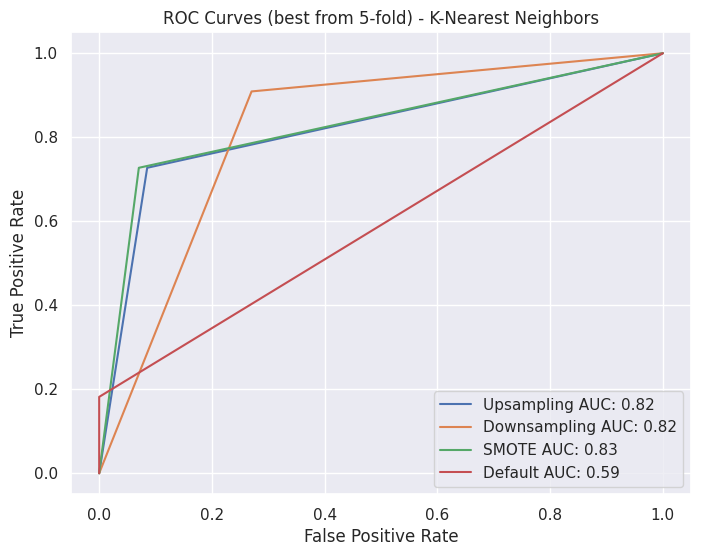

In [26]:
plot_roc_curves(best_performing_ups_knn_model,
                best_performing_dwn_knn_model,
                best_performing_smote_knn_model,
                best_performing_default_knn_model, 'ROC Curves (best from 5-fold) - K-Nearest Neighbors')

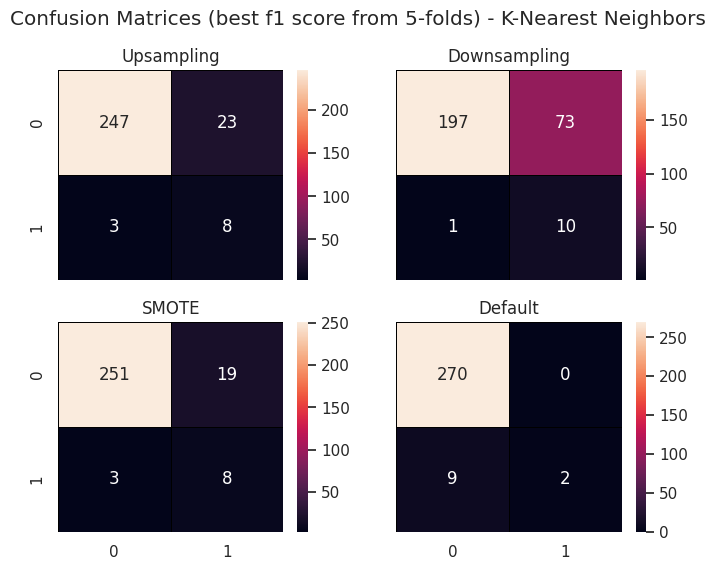

In [27]:
plot_confusion_matrices((best_performing_ups_knn_model,
                         best_performing_dwn_knn_model,
                         best_performing_smote_knn_model,
                         best_performing_default_knn_model), 'Confusion Matrices (best f1 score from 5-folds) - K-Nearest Neighbors')

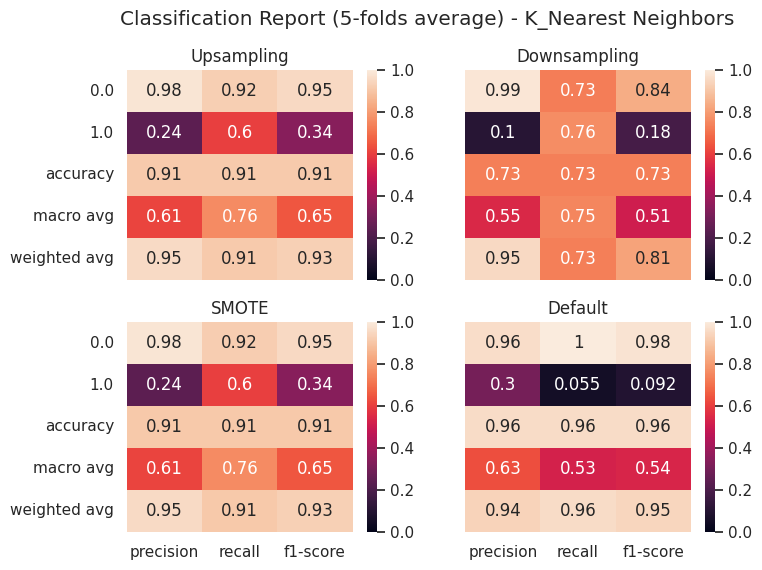

In [28]:
plot_classification_reports_averages((reports_ups_knn,
                                      reports_dwn_knn,
                                      reports_smote_knn,
                                      reports_default_knn),'Classification Report (5-folds average) - K_Nearest Neighbors')

## 5.3 Decision Tree

#### 5.3.1 Data preparation

In [29]:
# remove unecessesary features from dataset
df_dt = df_cl[['metacritic_critics', 'opening_weekend_($million)',
               'domestic_gross_($million)', 'foreign_gross_($million)',
               'oscar_winners']]

# Separate testing split from dataset
df_dt_train, df_dt_test = train_test_split(df_dt, test_size=0.2, stratify=df_dt['oscar_winners'])

# Separate classes
df_dt_majority = df_dt_train[(df_dt_train['oscar_winners']==0)].reset_index().drop('index', axis=1)
df_dt_minority = df_dt_train[(df_dt_train['oscar_winners']==1)].reset_index().drop('index', axis=1)

#### 5.3.2 Upsampling

In [30]:
# Umpsample the minority class
df_dt_minority_upsampled = resample(df_dt_minority, replace=True, n_samples= len(df_dt_majority), random_state=42)

df_dt_minority_upsampled = df_dt_minority_upsampled.reset_index().drop('index', axis=1)

df_dt_upsampled = pd.concat([df_dt_minority_upsampled, df_dt_majority]).sort_index(kind='merge')
df_dt_upsampled = df_dt_upsampled.reset_index().drop('index', axis=1)

In [31]:
# Prepare dataset for training k-fold splits
X = df_dt_upsampled.drop(['oscar_winners'], axis=1)
y = df_dt_upsampled[['oscar_winners']]

# Create k-fold splits and stratify classes
kf = StratifiedKFold(n_splits=5, shuffle=False)

reports_ups_dt = []
for i, train_idx in enumerate(kf.split(X, y), 1):

    train = df_dt_upsampled.iloc[train_idx[1]] 
    
    # Separate labels
    X_train, y_train = train.drop(['oscar_winners'], axis=1).values, train[['oscar_winners']].values
    y_train = y_train.squeeze(axis=1)

    model = DecisionTreeClassifier(criterion='gini', splitter='best')
    model.fit(X_train, y_train)

    # Test on test split
    X_test, y_test = df_dt_test.drop(['oscar_winners'], axis=1).values, df_dt_test[['oscar_winners']].values
    y_test = y_test.squeeze(axis=1)

    y_pred = model.predict(X_test)       
    acc = metrics.accuracy_score(y_test, y_pred)

    print(f"Fold {i} test accuracy: {acc:.4f}")

    y_pred = [float(x) for x in y_pred]
    y_test = [float(x) for x in y_test]

    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0.0)
    reports_ups_dt.append({'label' : 'Upsampling',
                            'report': report,
                            'true' : y_test,
                            'preds' : y_pred,
                            'X_train' : X_train,
                            'y_train' : y_train})

best_performing_ups_dt_model = max(reports_ups_dt, key=lambda a:a['report']['1.0']['f1-score'])

Fold 1 test accuracy: 0.8897
Fold 2 test accuracy: 0.8434
Fold 3 test accuracy: 0.8790
Fold 4 test accuracy: 0.9075
Fold 5 test accuracy: 0.9004


#### 5.3.3 Downsampling

In [32]:
# Downsample majority class
df_dt_majority_downsampled = resample(df_dt_majority, replace=True, n_samples= len(df_dt_minority), random_state=42)

df_dt_majority_downsampled = df_dt_majority_downsampled.reset_index().drop('index', axis=1)

df_dt_downsampled = pd.concat([df_dt_majority_downsampled, df_dt_minority]).sort_index(kind='merge')
df_dt_downsampled = df_dt_downsampled.reset_index().drop('index', axis=1)

In [33]:
# Prepare dataset for training k-fold splits
X = df_dt_downsampled.drop(['oscar_winners'], axis=1)
y = df_dt_downsampled[['oscar_winners']]

# Create k-fold splits and stratify classes
kf = StratifiedKFold(n_splits=5, shuffle=False)

reports_dwn_dt = []
for i, train_idx in enumerate(kf.split(X, y), 1):

    train = df_dt_downsampled.iloc[train_idx[1]] 
    
    # Separate labels
    X_train, y_train = train.drop(['oscar_winners'], axis=1).values, train[['oscar_winners']].values
    y_train = y_train.squeeze(axis=1)

    model = DecisionTreeClassifier(criterion='gini', splitter='best')
    model.fit(X_train, y_train)

    # Test on test split
    X_test, y_test = df_dt_test.drop(['oscar_winners'], axis=1).values, df_dt_test[['oscar_winners']].values
    y_test = y_test.squeeze(axis=1)

    y_pred = model.predict(X_test)       
    acc = metrics.accuracy_score(y_test, y_pred)

    print(f"Fold {i} test accuracy: {acc:.4f}")

    y_pred = [float(x) for x in y_pred]
    y_test = [float(x) for x in y_test]

    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0.0)
    reports_dwn_dt.append({'label' : 'Downsampling',
                            'report': report,
                            'true' : y_test,
                            'preds' : y_pred,
                            'X_train' : X_train,
                            'y_train' : y_train})

best_performing_dwn_dt_model = max(reports_dwn_dt, key=lambda a:a['report']['1.0']['f1-score'])

Fold 1 test accuracy: 0.8648
Fold 2 test accuracy: 0.4733
Fold 3 test accuracy: 0.9146
Fold 4 test accuracy: 0.7722
Fold 5 test accuracy: 0.8505


#### 5.3.4 SMOTE

In [34]:
# Resample using SMOTE method
sm = SMOTE(sampling_strategy='minority', random_state=42)

df_dt_oversampled_X, df_dt_oversampled_Y = sm.fit_resample(df_dt_train.drop('oscar_winners', axis=1), df_dt_train['oscar_winners'])
df_dt_oversampled = pd.concat([pd.DataFrame(df_dt_oversampled_X), pd.DataFrame(df_dt_oversampled_Y)], axis=1)

In [35]:
# Prepare dataset for training k-fold splits
X = df_dt_oversampled.drop(['oscar_winners'], axis=1)
y = df_dt_oversampled[['oscar_winners']]

# Create k-fold splits and stratify classes
kf = StratifiedKFold(n_splits=5, shuffle=False)

reports_smote_dt = []
for i, train_idx in enumerate(kf.split(X, y), 1):

    train = df_dt_oversampled.iloc[train_idx[1]] 
    
    # Separate labels
    X_train, y_train = train.drop(['oscar_winners'], axis=1).values, train[['oscar_winners']].values
    y_train = y_train.squeeze(axis=1)

    model = DecisionTreeClassifier(criterion='gini', splitter='best')
    model.fit(X_train, y_train)
    
    # Test on test split
    X_test, y_test = df_dt_test.drop(['oscar_winners'], axis=1).values, df_dt_test[['oscar_winners']].values
    y_test = y_test.squeeze(axis=1)

    y_pred = model.predict(X_test)       
    acc = metrics.accuracy_score(y_test, y_pred)

    print(f"Fold {i} test accuracy: {acc:.4f}")

    y_pred = [float(x) for x in y_pred]
    y_test = [float(x) for x in y_test]

    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0.0)
    reports_smote_dt.append({'label' : 'SMOTE',
                            'report': report,
                            'true' : y_test,
                            'preds' : y_pred,
                            'X_train' : X_train,
                            'y_train' : y_train})

best_performing_smote_dt_model = max(reports_smote_dt, key=lambda a:a['report']['1.0']['f1-score'])

Fold 1 test accuracy: 0.8541
Fold 2 test accuracy: 0.8577
Fold 3 test accuracy: 0.9181
Fold 4 test accuracy: 0.8470
Fold 5 test accuracy: 0.8968


#### 5.3.5 Default

In [36]:
# Prepare dataset for training k-fold splits
X = df_dt_train.drop(['oscar_winners'], axis=1)
y = df_dt_train[['oscar_winners']]

# Create k-fold splits and stratify classes
kf = StratifiedKFold(n_splits=5, shuffle=False)

reports_default_dt = []
for i, train_idx in enumerate(kf.split(X, y), 1):

    train = df_dt_train.iloc[train_idx[1]] 
    
    # Separate labels
    X_train, y_train = train.drop(['oscar_winners'], axis=1).values, train[['oscar_winners']].values
    y_train = y_train.squeeze(axis=1)

    model = DecisionTreeClassifier(criterion='gini', splitter='best')
    model.fit(X_train, y_train)

    # Test on test split
    X_test, y_test = df_dt_test.drop(['oscar_winners'], axis=1).values, df_dt_test[['oscar_winners']].values
    y_test = y_test.squeeze(axis=1)

    y_pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)

    print(f"Fold {i} test accuracy: {acc:.4f}")

    y_pred = [float(x) for x in y_pred]
    y_test = [float(x) for x in y_test]    

    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0.0)
    reports_default_dt.append({'label' : 'Default',
                            'report': report,
                            'true' : y_test,
                            'preds' : y_pred,
                            'X_train' : X_train,
                            'y_train' : y_train})

best_performing_default_dt_model = max(reports_default_dt, key=lambda a:a['report']['1.0']['f1-score'])

Fold 1 test accuracy: 0.9609
Fold 2 test accuracy: 0.9253
Fold 3 test accuracy: 0.9359
Fold 4 test accuracy: 0.9609
Fold 5 test accuracy: 0.9573


#### 5.3.6 Plots

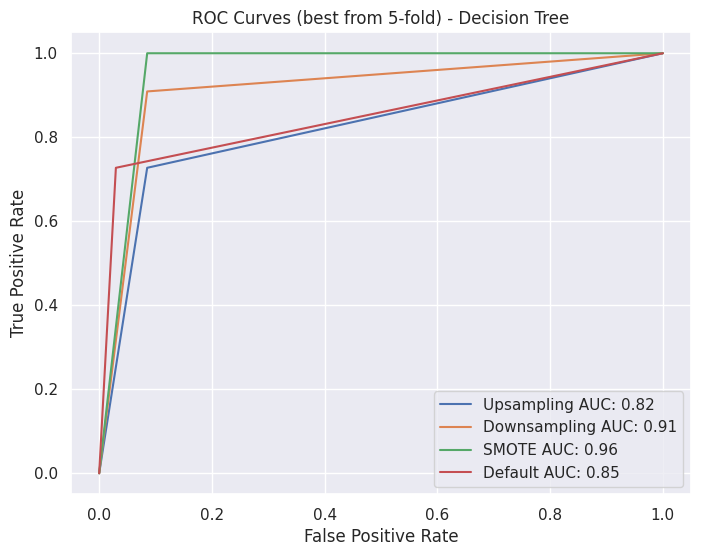

In [37]:
plot_roc_curves(best_performing_ups_dt_model,
                best_performing_dwn_dt_model,
                best_performing_smote_dt_model,
                best_performing_default_dt_model, 'ROC Curves (best from 5-fold) - Decision Tree')

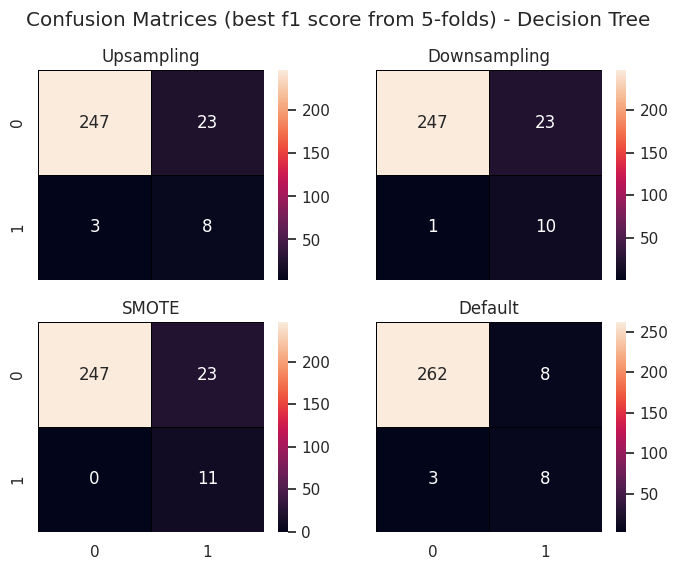

In [38]:
plot_confusion_matrices((best_performing_ups_dt_model,
                         best_performing_dwn_dt_model,
                         best_performing_smote_dt_model,
                         best_performing_default_dt_model), 'Confusion Matrices (best f1 score from 5-folds) - Decision Tree')

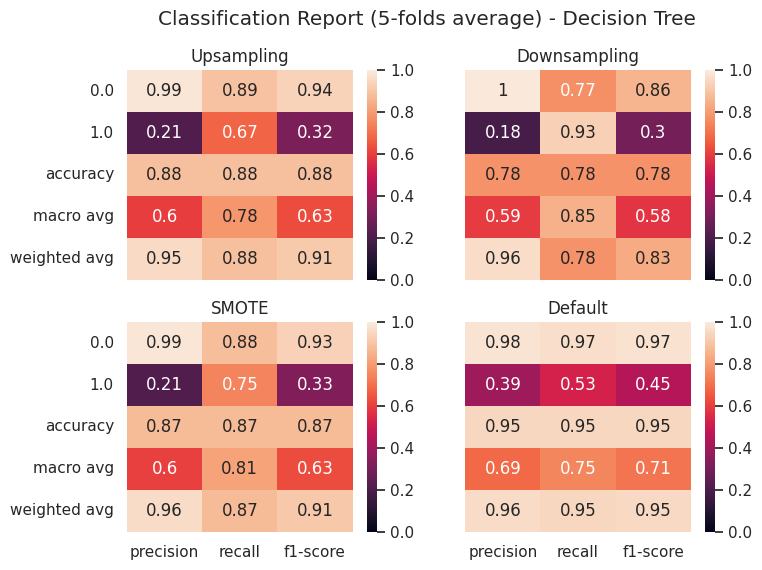

In [39]:
plot_classification_reports_averages((reports_ups_dt,
                                      reports_dwn_dt,
                                      reports_smote_dt,
                                      reports_default_dt),'Classification Report (5-folds average) - Decision Tree')

## Gradient Boost

#### Data preparation

In [40]:
# remove unecessesary features from dataset
# df_cnb = df_cl[['metacritic_critics', 'opening_weekend_($million)',
#                'domestic_gross_($million)', 'foreign_gross_($million)',
#                'oscar_winners']]

# df_grb = df_cl.drop(['film','year','opening_weekend', 'domestic_gross', 'foreign_gross', 'worldwide_gross', 'rotten_tomatoes_vs_metacritic_deviance', 
#                     'audience_vs_critics_deviance', 'worldwide_gross_($million)', 'of_gross_earned_abroad', 'average_audience', 'average_critics', 
#                     'budget_recovered', 'budget_recovered_opening_weekend', 'distributor','imdb_rating','imdb_vs_rt_disparity','release_date_(us)',
#                     'oscar_detail'], axis=1)

df_grb = df_cl.drop(['film','year', 'distributor','imdb_rating','imdb_vs_rt_disparity','release_date_(us)',
                    'oscar_detail'], axis=1)

# Separate testing split from dataset
df_grb_train, df_grb_test = train_test_split(df_grb, test_size=0.2, stratify=df_grb['oscar_winners'])

# Separate classes
df_grb_majority = df_grb_train[(df_grb_train['oscar_winners']==0)].reset_index().drop('index', axis=1)
df_grb_minority = df_grb_train[(df_grb_train['oscar_winners']==1)].reset_index().drop('index', axis=1)

#### Upsample

In [41]:
# Umpsample the minority class
df_grb_minority_upsampled = resample(df_grb_minority, replace=True, n_samples= len(df_grb_majority), random_state=42)

df_grb_minority_upsampled = df_grb_minority_upsampled.reset_index().drop('index', axis=1)

df_grb_upsampled = pd.concat([df_grb_minority_upsampled, df_grb_majority]).sort_index(kind='merge')
df_grb_upsampled = df_grb_upsampled.reset_index().drop('index', axis=1)

In [42]:
# Prepare dataset for training k-fold splits
X = df_grb_upsampled.drop(['oscar_winners'], axis=1)
y = df_grb_upsampled[['oscar_winners']]

# Create k-fold splits and stratify classes
kf = StratifiedKFold(n_splits=5, shuffle=False)

reports_ups_grb = []
for i, train_idx in enumerate(kf.split(X, y), 1):

    train = df_grb_upsampled.iloc[train_idx[1]] 
    
    # Separate labels
    X_train, y_train = train.drop(['oscar_winners'], axis=1).values, train[['oscar_winners']].values
    y_train = y_train.squeeze(axis=1)

    model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
    model.fit(X_train, y_train)

    # Test on test split
    X_test, y_test = df_grb_test.drop(['oscar_winners'], axis=1).values, df_grb_test[['oscar_winners']].values
    y_test = y_test.squeeze(axis=1)

    y_pred = model.predict(X_test)       
    acc = metrics.accuracy_score(y_test, y_pred)

    print(f"Fold {i} test accuracy: {acc:.4f}")

    y_pred = [float(x) for x in y_pred]
    y_test = [float(x) for x in y_test]

    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0.0)
    reports_ups_grb.append({'label' : 'Upsampling',
                            'report': report,
                            'true' : y_test,
                            'preds' : y_pred,
                            'X_train' : X_train,
                            'y_train' : y_train})

best_performing_ups_grb_model = max(reports_ups_grb, key=lambda a:a['report']['1.0']['f1-score'])

Fold 1 test accuracy: 0.9039
Fold 2 test accuracy: 0.8719
Fold 3 test accuracy: 0.9039
Fold 4 test accuracy: 0.9181
Fold 5 test accuracy: 0.9075


#### Downsample

In [43]:
# Downsample majority class
df_grb_majority_downsampled = resample(df_grb_majority, replace=True, n_samples= len(df_grb_minority), random_state=42)

df_grb_majority_downsampled = df_grb_majority_downsampled.reset_index().drop('index', axis=1)

df_grb_downsampled = pd.concat([df_grb_majority_downsampled, df_grb_minority]).sort_index(kind='merge')
df_grb_downsampled = df_grb_downsampled.reset_index().drop('index', axis=1)

In [44]:
# Prepare dataset for training k-fold splits
X = df_grb_downsampled.drop(['oscar_winners'], axis=1)
y = df_grb_downsampled[['oscar_winners']]

# Create k-fold splits and stratify classes
kf = StratifiedKFold(n_splits=5, shuffle=False)

reports_dwn_grb = []
for i, train_idx in enumerate(kf.split(X, y), 1):

    train = df_grb_downsampled.iloc[train_idx[1]] 
    
    # Separate labels
    X_train, y_train = train.drop(['oscar_winners'], axis=1).values, train[['oscar_winners']].values
    y_train = y_train.squeeze(axis=1)

    model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
    model.fit(X_train, y_train)

    # Test on test split
    X_test, y_test = df_grb_test.drop(['oscar_winners'], axis=1).values, df_grb_test[['oscar_winners']].values
    y_test = y_test.squeeze(axis=1)

    y_pred = model.predict(X_test)       
    acc = metrics.accuracy_score(y_test, y_pred)

    print(f"Fold {i} test accuracy: {acc:.4f}")

    y_pred = [float(x) for x in y_pred]
    y_test = [float(x) for x in y_test]

    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0.0)
    reports_dwn_grb.append({'label' : 'Downsampling',
                            'report': report,
                            'true' : y_test,
                            'preds' : y_pred,
                            'X_train' : X_train,
                            'y_train' : y_train})

best_performing_dwn_grb_model = max(reports_dwn_grb, key=lambda a:a['report']['1.0']['f1-score'])

Fold 1 test accuracy: 0.7544
Fold 2 test accuracy: 0.6263
Fold 3 test accuracy: 0.7829
Fold 4 test accuracy: 0.7402
Fold 5 test accuracy: 0.8505


#### SMOTE

In [45]:
# Resample using SMOTE method
sm = SMOTE(sampling_strategy='minority', random_state=42)

df_grb_oversampled_X, df_grb_oversampled_Y = sm.fit_resample(df_grb_train.drop('oscar_winners', axis=1), df_grb_train['oscar_winners'])
df_grb_oversampled = pd.concat([pd.DataFrame(df_grb_oversampled_X), pd.DataFrame(df_grb_oversampled_Y)], axis=1)

In [46]:
# Prepare dataset for training k-fold splits
X = df_grb_oversampled.drop(['oscar_winners'], axis=1)
y = df_grb_oversampled[['oscar_winners']]

# Create k-fold splits and stratify classes
kf = StratifiedKFold(n_splits=5, shuffle=False)

reports_smote_grb = []
for i, train_idx in enumerate(kf.split(X, y), 1):

    train = df_grb_oversampled.iloc[train_idx[1]] 
    
    # Separate labels
    X_train, y_train = train.drop(['oscar_winners'], axis=1).values, train[['oscar_winners']].values
    y_train = y_train.squeeze(axis=1)

    model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
    model.fit(X_train, y_train)
    
    # Test on test split
    X_test, y_test = df_grb_test.drop(['oscar_winners'], axis=1).values, df_grb_test[['oscar_winners']].values
    y_test = y_test.squeeze(axis=1)

    y_pred = model.predict(X_test)       
    acc = metrics.accuracy_score(y_test, y_pred)

    print(f"Fold {i} test accuracy: {acc:.4f}")

    y_pred = [float(x) for x in y_pred]
    y_test = [float(x) for x in y_test]

    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0.0)
    reports_smote_grb.append({'label' : 'SMOTE',
                            'report': report,
                            'true' : y_test,
                            'preds' : y_pred,
                            'X_train' : X_train,
                            'y_train' : y_train})

best_performing_smote_grb_model = max(reports_smote_grb, key=lambda a:a['report']['1.0']['f1-score'])

Fold 1 test accuracy: 0.9075
Fold 2 test accuracy: 0.8861
Fold 3 test accuracy: 0.9110
Fold 4 test accuracy: 0.9217
Fold 5 test accuracy: 0.9075


#### Default

In [47]:
# Prepare dataset for training k-fold splits
X = df_grb_train.drop(['oscar_winners'], axis=1)
y = df_grb_train[['oscar_winners']]

# Create k-fold splits and stratify classes
kf = StratifiedKFold(n_splits=5, shuffle=False)

reports_default_grb = []
for i, train_idx in enumerate(kf.split(X, y), 1):

    train = df_grb_train.iloc[train_idx[1]] 
    
    # Separate labels
    X_train, y_train = train.drop(['oscar_winners'], axis=1).values, train[['oscar_winners']].values
    y_train = y_train.squeeze(axis=1)

    model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
    model.fit(X_train, y_train)

    # Test on test split
    X_test, y_test = df_grb_test.drop(['oscar_winners'], axis=1).values, df_grb_test[['oscar_winners']].values
    y_test = y_test.squeeze(axis=1)

    y_pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)

    print(f"Fold {i} test accuracy: {acc:.4f}")

    y_pred = [float(x) for x in y_pred]
    y_test = [float(x) for x in y_test]    

    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0.0)
    reports_default_grb.append({'label' : 'Default',
                            'report': report,
                            'true' : y_test,
                            'preds' :y_pred,
                            'X_train' : X_train,
                            'y_train' : y_train})

best_performing_default_grb_model = max(reports_default_grb, key=lambda a:a['report']['1.0']['f1-score'])

Fold 1 test accuracy: 0.9502
Fold 2 test accuracy: 0.9466
Fold 3 test accuracy: 0.9004
Fold 4 test accuracy: 0.9537
Fold 5 test accuracy: 0.9573


### Plots

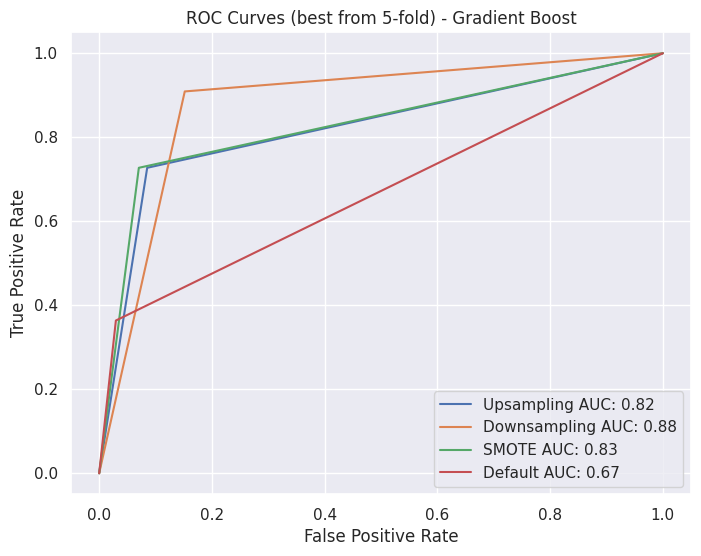

In [48]:
plot_roc_curves(best_performing_ups_grb_model,
                best_performing_dwn_grb_model,
                best_performing_smote_grb_model,
                best_performing_default_grb_model, 
                'ROC Curves (best from 5-fold) - Gradient Boost')

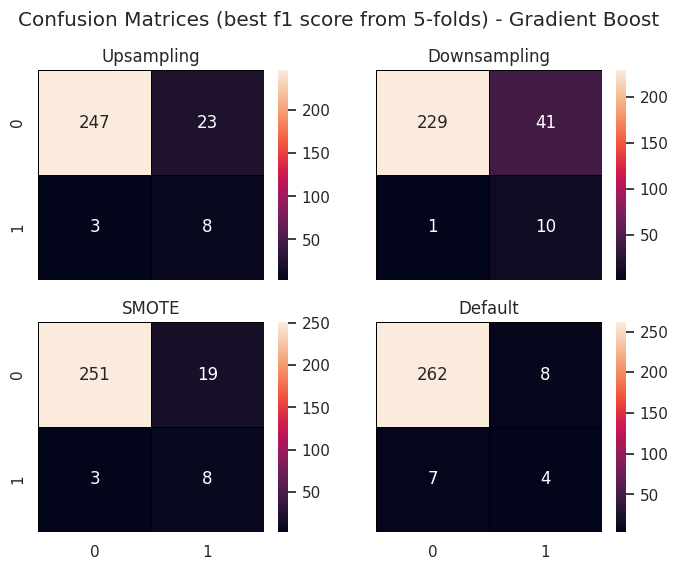

In [49]:
plot_confusion_matrices((best_performing_ups_grb_model,
                         best_performing_dwn_grb_model,
                         best_performing_smote_grb_model,
                         best_performing_default_grb_model), 
                         'Confusion Matrices (best f1 score from 5-folds) - Gradient Boost')

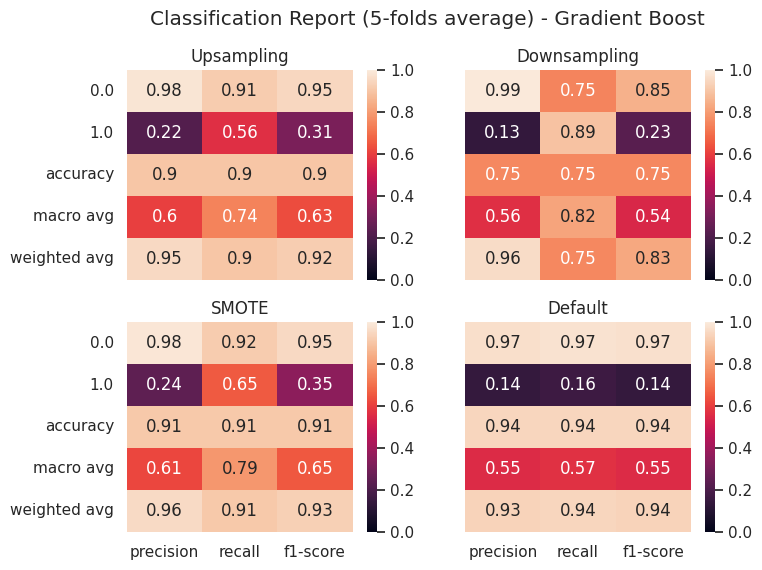

In [50]:
plot_classification_reports_averages((reports_ups_grb,
                                      reports_dwn_grb,
                                      reports_smote_grb,
                                      reports_default_grb),
                                      'Classification Report (5-folds average) - Gradient Boost')

## ADA boost

#### Data preparation

In [51]:
# remove unecessesary features from dataset
# df_ada = df_cl.drop(['film','year','opening_weekend', 'domestic_gross', 'foreign_gross', 'worldwide_gross', 'rotten_tomatoes_vs_metacritic_deviance', 
#                     'audience_vs_critics_deviance', 'worldwide_gross_($million)', 'of_gross_earned_abroad', 'average_audience', 'average_critics', 
#                     'budget_recovered', 'budget_recovered_opening_weekend', 'distributor','imdb_rating','imdb_vs_rt_disparity','release_date_(us)',
#                     'oscar_detail'], axis=1)

df_ada = df_cl.drop(['film','year', 'distributor','imdb_rating','imdb_vs_rt_disparity','release_date_(us)',
                    'oscar_detail'], axis=1)

# df_ada = df_cl[['average_audience','average_critics']]

# Separate testing split from dataset
df_ada_train, df_ada_test = train_test_split(df_ada, test_size=0.2, stratify=df_ada['oscar_winners'])

# Separate classes
df_ada_majority = df_ada_train[(df_ada_train['oscar_winners']==0)].reset_index().drop('index', axis=1)
df_ada_minority = df_ada_train[(df_ada_train['oscar_winners']==1)].reset_index().drop('index', axis=1)

#### Upsampling


In [52]:
# Umpsample the minority class
df_ada_minority_upsampled = resample(df_ada_minority, replace=True, n_samples= len(df_ada_majority), random_state=42)

df_ada_minority_upsampled = df_ada_minority_upsampled.reset_index().drop('index', axis=1)

df_ada_upsampled = pd.concat([df_ada_minority_upsampled, df_ada_majority]).sort_index(kind='merge')
df_ada_upsampled = df_ada_upsampled.reset_index().drop('index', axis=1)

In [53]:
# Prepare dataset for training k-fold splits
X = df_ada_upsampled.drop(['oscar_winners'], axis=1)
y = df_ada_upsampled[['oscar_winners']]

# Create k-fold splits and stratify classes
kf = StratifiedKFold(n_splits=5, shuffle=False)

reports_ups_ada = []
for i, train_idx in enumerate(kf.split(X, y), 1):

    train = df_ada_upsampled.iloc[train_idx[1]] 
    
    # Separate labels
    X_train, y_train = train.drop(['oscar_winners'], axis=1).values, train[['oscar_winners']].values
    y_train = y_train.squeeze(axis=1)

    model = AdaBoostClassifier(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)

    # Test on test split
    X_test, y_test = df_ada_test.drop(['oscar_winners'], axis=1).values, df_ada_test[['oscar_winners']].values
    y_test = y_test.squeeze(axis=1)

    y_pred = model.predict(X_test)       
    acc = metrics.accuracy_score(y_test, y_pred)

    print(f"Fold {i} test accuracy: {acc:.4f}")

    y_pred = [float(x) for x in y_pred]
    y_test = [float(x) for x in y_test]

    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0.0)
    reports_ups_ada.append({'label' : 'Upsampling',
                            'report': report,
                            'true' : y_test,
                            'preds' : y_pred,
                            'X_train' : X_train,
                            'y_train' : y_train})

best_performing_ups_ada_model = max(reports_ups_ada, key=lambda a:a['report']['1.0']['f1-score'])

Fold 1 test accuracy: 0.9217
Fold 2 test accuracy: 0.9217
Fold 3 test accuracy: 0.8897
Fold 4 test accuracy: 0.8897
Fold 5 test accuracy: 0.9181


#### 5.3.3 Downsampling

In [54]:
# Downsample majority class
df_ada_majority_downsampled = resample(df_ada_majority, replace=True, n_samples= len(df_ada_minority), random_state=42)

df_ada_majority_downsampled = df_ada_majority_downsampled.reset_index().drop('index', axis=1)

df_ada_downsampled = pd.concat([df_ada_majority_downsampled, df_ada_minority]).sort_index(kind='merge')
df_ada_downsampled = df_ada_downsampled.reset_index().drop('index', axis=1)

In [55]:
# Prepare dataset for training k-fold splits
X = df_ada_downsampled.drop(['oscar_winners'], axis=1)
y = df_ada_downsampled[['oscar_winners']]

# Create k-fold splits and stratify classes
kf = StratifiedKFold(n_splits=5, shuffle=False)

reports_dwn_ada = []
for i, train_idx in enumerate(kf.split(X, y), 1):

    train = df_ada_downsampled.iloc[train_idx[1]] 
    
    # Separate labels
    X_train, y_train = train.drop(['oscar_winners'], axis=1).values, train[['oscar_winners']].values
    y_train = y_train.squeeze(axis=1)

    model = AdaBoostClassifier(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)

    # Test on test split
    X_test, y_test = df_ada_test.drop(['oscar_winners'], axis=1).values, df_ada_test[['oscar_winners']].values
    y_test = y_test.squeeze(axis=1)

    y_pred = model.predict(X_test)       
    acc = metrics.accuracy_score(y_test, y_pred)

    print(f"Fold {i} test accuracy: {acc:.4f}")

    y_pred = [float(x) for x in y_pred]
    y_test = [float(x) for x in y_test]

    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0.0)
    reports_dwn_ada.append({'label' : 'Downsampling',
                            'report': report,
                            'true' : y_test,
                            'preds' : y_pred,
                            'X_train' : X_train,
                            'y_train' : y_train})

best_performing_dwn_ada_model = max(reports_dwn_ada, key=lambda a:a['report']['1.0']['f1-score'])

Fold 1 test accuracy: 0.7972
Fold 2 test accuracy: 0.7082
Fold 3 test accuracy: 0.6512
Fold 4 test accuracy: 0.7046
Fold 5 test accuracy: 0.8790


#### SMOTE

In [56]:
# Resample using SMOTE method
sm = SMOTE(sampling_strategy='minority', random_state=42)

df_ada_oversampled_X, df_ada_oversampled_Y = sm.fit_resample(df_ada_train.drop('oscar_winners', axis=1), df_ada_train['oscar_winners'])
df_ada_oversampled = pd.concat([pd.DataFrame(df_ada_oversampled_X), pd.DataFrame(df_ada_oversampled_Y)], axis=1)

In [57]:
# Prepare dataset for training k-fold splits
X = df_ada_oversampled.drop(['oscar_winners'], axis=1)
y = df_ada_oversampled[['oscar_winners']]

# Create k-fold splits and stratify classes
kf = StratifiedKFold(n_splits=5, shuffle=False)

reports_smote_ada = []
for i, train_idx in enumerate(kf.split(X, y), 1):

    train = df_ada_oversampled.iloc[train_idx[1]] 
    
    # Separate labels
    X_train, y_train = train.drop(['oscar_winners'], axis=1).values, train[['oscar_winners']].values
    y_train = y_train.squeeze(axis=1)

    model = AdaBoostClassifier(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    
    # Test on test split
    X_test, y_test = df_ada_test.drop(['oscar_winners'], axis=1).values, df_ada_test[['oscar_winners']].values
    y_test = y_test.squeeze(axis=1)

    y_pred = model.predict(X_test)       
    acc = metrics.accuracy_score(y_test, y_pred)

    print(f"Fold {i} test accuracy: {acc:.4f}")

    y_pred = [float(x) for x in y_pred]
    y_test = [float(x) for x in y_test]

    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0.0)
    reports_smote_ada.append({'label' : 'SMOTE',
                            'report': report,
                            'true' : y_test,
                            'preds' : y_pred,
                            'X_train' : X_train,
                            'y_train' : y_train})

best_performing_smote_ada_model = max(reports_smote_ada, key=lambda a:a['report']['1.0']['f1-score'])

Fold 1 test accuracy: 0.9075
Fold 2 test accuracy: 0.9039
Fold 3 test accuracy: 0.8861
Fold 4 test accuracy: 0.8754
Fold 5 test accuracy: 0.8790


#### Default

In [58]:
# Prepare dataset for training k-fold splits
X = df_ada_train.drop(['oscar_winners'], axis=1)
y = df_ada_train[['oscar_winners']]

# Create k-fold splits and stratify classes
kf = StratifiedKFold(n_splits=5, shuffle=False)

reports_default_ada = []
for i, train_idx in enumerate(kf.split(X, y), 1):

    train = df_ada_train.iloc[train_idx[1]] 
    
    # Separate labels
    X_train, y_train = train.drop(['oscar_winners'], axis=1).values, train[['oscar_winners']].values
    y_train = y_train.squeeze(axis=1)

    model = AdaBoostClassifier(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)

    # Test on test split
    X_test, y_test = df_ada_test.drop(['oscar_winners'], axis=1).values, df_ada_test[['oscar_winners']].values
    y_test = y_test.squeeze(axis=1)

    y_pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)

    print(f"Fold {i} test accuracy: {acc:.4f}")

    y_pred = [float(x) for x in y_pred]
    y_test = [float(x) for x in y_test]    

    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0.0)
    reports_default_ada.append({'label' : 'Default',
                            'report': report,
                            'true' : y_test,
                            'preds' : y_pred,
                            'X_train' : X_train,
                            'y_train' : y_train})

best_performing_default_ada_model = max(reports_default_ada, key=lambda a:a['report']['1.0']['f1-score'])

Fold 1 test accuracy: 0.9502
Fold 2 test accuracy: 0.9573
Fold 3 test accuracy: 0.9359
Fold 4 test accuracy: 0.9609
Fold 5 test accuracy: 0.9573


#### Plots

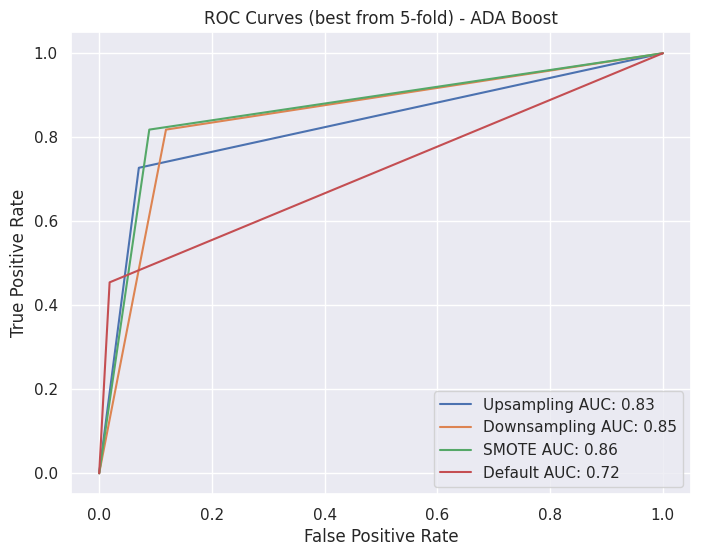

In [59]:
plot_roc_curves(best_performing_ups_ada_model,
                best_performing_dwn_ada_model,
                best_performing_smote_ada_model,
                best_performing_default_ada_model, 
                'ROC Curves (best from 5-fold) - ADA Boost')

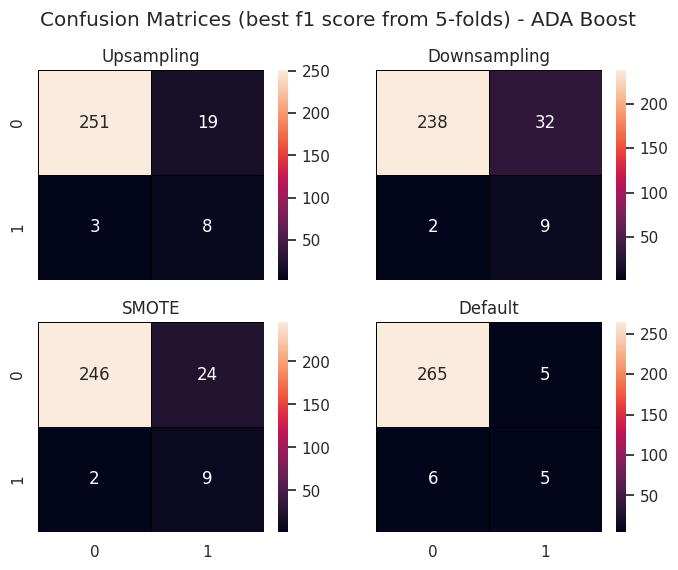

In [60]:
plot_confusion_matrices((best_performing_ups_ada_model,
                         best_performing_dwn_ada_model,
                         best_performing_smote_ada_model,
                         best_performing_default_ada_model), 
                         'Confusion Matrices (best f1 score from 5-folds) - ADA Boost')

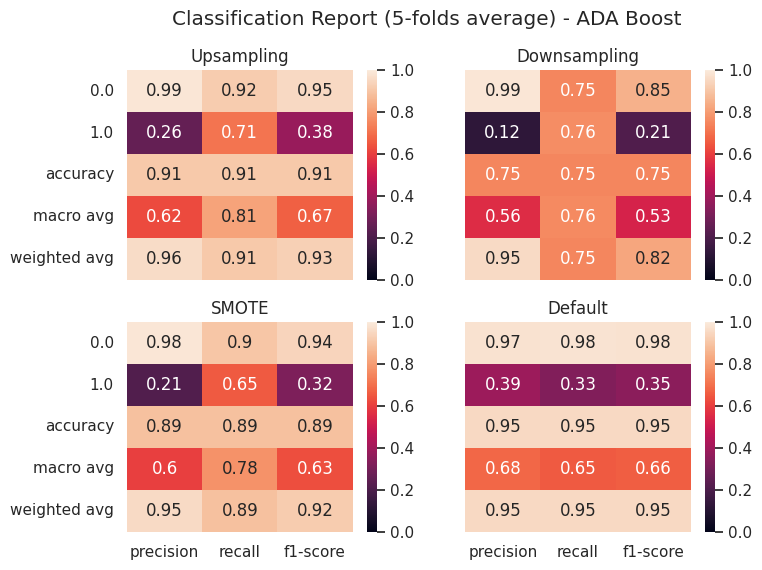

In [61]:
plot_classification_reports_averages((reports_ups_ada,
                                      reports_dwn_ada,
                                      reports_smote_ada,
                                      reports_default_ada),
                                      'Classification Report (5-folds average) - ADA Boost')

# 6. Προβλέψεις στο άγνωστο σύνολο δεδομένων
Χρησιμοποιούμε τα εκπαιδευμένα μοντέλα κτηγοριοποίησης για να προβλέψουμε στο άγνωστο σύνολο δεδομένων αν πήραν oscar ή όχι.

## 6.1 Νευρωνικό δίκτυο

In [62]:
# df_un_cl_nn = df_un_cl.drop(['film','year','opening_weekend', 'domestic_gross', 'foreign_gross', 'worldwide_gross', 'rotten_tomatoes_vs_metacritic_deviance', 
#                     'audience_vs_critics_deviance', 'worldwide_gross_($million)', 'of_gross_earned_abroad', 'average_audience', 'average_critics', 
#                     'budget_recovered', 'budget_recovered_opening_weekend', 'distributor','imdb_rating','imdb_vs_rt_disparity','release_date_(us)', 'oscar_winners', 'oscar_detail'], axis=1)

In [63]:
# X = torch.tensor(df_un_cl_nn.values, dtype=torch.float)

# best_perf = [best_performing_default_nn_model, best_performing_dwn_nn_model, best_performing_ups_nn_model, best_performing_smote_nn_model]


# for model_dict in best_perf:
#     print(model_dict['label'])
#     neural_network = OscarClassificationNeuralNetwork(input_features=nn_input_features, 
#                                                         hidden_layer_input_features = nn_input_features,
#                                                         hidden_layer_output_features = nn_input_features,
#                                                         device='cpu',                                               
#                                                         learning_rate=0.01)

#     neural_network.load_state_dict(model_dict['dict'])

#     with torch.inference_mode():
#         neural_network.eval()
#         un_nn_preds = neural_network(X)

#     preds_df = pd.DataFrame(torch.round(torch.sigmoid(un_nn_preds)))

#     df_un_orig[f'Neural network {model_dict["label"]} prediction'] = preds_df

Use majority vote from models trained on different dataset sampling techniques

In [64]:
# df_un_orig['neural network oscar predictions (majority)'] = df_un_orig.apply(lambda row: 1 if (row['Neural network Default prediction'] + row['Neural network SMOTE prediction'] + row['Neural network Downsampling prediction'] + row['Neural network Upsampling prediction'] >= 3) else 0, axis=1)

In [65]:
# df_un_orig[df_un_orig['Neural network Default prediction'] + df_un_orig['Neural network SMOTE prediction'] + df_un_orig['Neural network Downsampling prediction'] + df_un_orig['Neural network Upsampling prediction'] >= 3]

In [66]:
# df_un_orig = df_un_orig.drop(['Neural network Default prediction', 'Neural network SMOTE prediction', 'Neural network Downsampling prediction', 'Neural network Upsampling prediction'], axis =1)
# df_un_orig[df_un_orig['neural network oscar predictions (majority)'] == 1]

## 6.2 KNN

In [67]:
df_un_cl_knn = df_un_cl[['rotten_tomatoes_critics', 'metacritic_critics',
       'rotten_tomatoes_audience', 'metacritic_audience',
       'opening_weekend_($million)', 'domestic_gross_($million)',
       'foreign_gross_($million)', 'budget_($million)']]

X = df_un_cl_knn.values
best_knn_models = [best_performing_default_knn_model, best_performing_dwn_knn_model, best_performing_ups_knn_model, best_performing_smote_knn_model]

In [68]:
# for model_dict in best_knn_models:
#     # print(model_dict)
#     knn = KNeighborsClassifier(n_neighbors=model_dict['best_k'])
#     knn.fit(model_dict['X_train'], model_dict['y_train'])

#     un_knn_preds = knn.predict(X)

#     preds_df = pd.DataFrame(un_knn_preds)

#     df_un_orig[f'KNN {model_dict["label"]} prediction'] = preds_df

In [69]:
best_performing_knn_model = max(best_knn_models, key=lambda a:a['report']['1.0']['f1-score'])

knn = KNeighborsClassifier(n_neighbors=best_performing_knn_model['best_k'])
knn.fit(best_performing_knn_model['X_train'], best_performing_knn_model['y_train'])

un_knn_preds = knn.predict(X)

preds_df = pd.DataFrame(un_knn_preds)

df_un_orig[f'KNN'] = preds_df

In [70]:
len(df_un_orig[df_un_orig['KNN'] == 1])

60

In [71]:
# df_un_orig['KNN oscar predictions (majority)'] = df_un_orig.apply(lambda row: 1 if (row['KNN Default prediction'] + 
#                                                                                                row['KNN SMOTE prediction'] + 
#                                                                                                row['KNN Downsampling prediction'] + 
#                                                                                                row['KNN Upsampling prediction'] >= 3)
#                                                                                              else 0, axis=1)

In [72]:
# df_un_orig = df_un_orig.drop(['KNN Default prediction',
#                               'KNN SMOTE prediction',
#                               'KNN Downsampling prediction',
#                               'KNN Upsampling prediction'], axis =1)

# df_un_orig[df_un_orig['KNN oscar predictions (majority)'] == 1]

## 6.3 Decision Tree

In [73]:
df_un_cl_dt = df_un_cl[['metacritic_critics', 'opening_weekend_($million)',
               'domestic_gross_($million)', 'foreign_gross_($million)']]

X = df_un_cl_dt.values
best_dt_models = [best_performing_default_dt_model, best_performing_dwn_dt_model, best_performing_ups_dt_model, best_performing_smote_dt_model]

In [74]:
# X = df_un_cl_dt.values

# best_perf = [best_performing_default_dt_model, best_performing_dwn_dt_model, best_performing_ups_dt_model, best_performing_smote_dt_model]

# for model_dict in best_perf:

#     dt = DecisionTreeClassifier(criterion='gini', splitter='best')
#     dt.fit(model_dict['X_train'], model_dict['y_train'])

#     un_dt_preds = dt.predict(X)

#     preds_df = pd.DataFrame(un_dt_preds)

#     df_un_orig[f'DT {model_dict["label"]} prediction'] = preds_df

In [75]:
best_performing_dt_model = max(best_dt_models, key=lambda a:a['report']['1.0']['f1-score'])

dt = DecisionTreeClassifier(criterion='gini', splitter='best')
dt.fit(best_performing_dt_model['X_train'], best_performing_dt_model['y_train'])

un_dt_preds = dt.predict(X)

preds_df = pd.DataFrame(un_dt_preds)

df_un_orig['DT'] = preds_df

In [76]:
len(df_un_orig[df_un_orig['DT'] == 1])

28

## 6.4 GRB

In [77]:
# df_un_cl_cnb  = df_un_cl.drop(['film','year','opening_weekend', 'domestic_gross', 'foreign_gross', 'worldwide_gross', 'rotten_tomatoes_vs_metacritic_deviance', 
#                     'audience_vs_critics_deviance', 'worldwide_gross_($million)', 'of_gross_earned_abroad', 'average_audience', 'average_critics', 
#                     'budget_recovered', 'budget_recovered_opening_weekend', 'distributor','imdb_rating','imdb_vs_rt_disparity','release_date_(us)',
#                     'oscar_detail', 'oscar_winners'], axis=1)

df_un_cl_grb = df_un_cl.drop(['film','year', 'distributor','imdb_rating','imdb_vs_rt_disparity','release_date_(us)',
                    'oscar_detail', 'oscar_winners'], axis=1)

X = df_un_cl_grb.values
best_grb_models = [best_performing_default_grb_model, best_performing_dwn_grb_model, best_performing_ups_grb_model, best_performing_smote_grb_model]

In [78]:
best_performing_cnb_model = max(best_grb_models, key=lambda a:a['report']['1.0']['f1-score'])

grb = GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0, max_depth=1, random_state=0)
grb.fit(best_performing_cnb_model['X_train'], best_performing_cnb_model['y_train'])

un_grb_preds = grb.predict(X)

preds_df = pd.DataFrame(un_grb_preds)

df_un_orig['GRB'] = preds_df

In [79]:
len(df_un_orig[df_un_orig['GRB'] == 1])

69

## 6.5 ADA Boost

In [80]:
# df_un_cl_ada  = df_un_cl.drop(['film','year','opening_weekend', 'domestic_gross', 'foreign_gross', 'worldwide_gross', 'rotten_tomatoes_vs_metacritic_deviance', 
#                     'audience_vs_critics_deviance', 'worldwide_gross_($million)', 'of_gross_earned_abroad', 'average_audience', 'average_critics', 
#                     'budget_recovered', 'budget_recovered_opening_weekend', 'distributor','imdb_rating','imdb_vs_rt_disparity','release_date_(us)',
#                     'oscar_detail', 'oscar_winners'], axis=1)

df_un_cl_ada = df_un_cl.drop(['film','year', 'distributor','imdb_rating','imdb_vs_rt_disparity','release_date_(us)',
                    'oscar_detail', 'oscar_winners'], axis=1)

X = df_un_cl_ada.values
best_ada_models = [best_performing_default_ada_model, best_performing_dwn_ada_model, best_performing_ups_ada_model, best_performing_smote_ada_model]

In [81]:
best_performing_ada_model = max(best_ada_models, key=lambda a:a['report']['1.0']['f1-score'])

ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(best_performing_ada_model['X_train'], best_performing_ada_model['y_train'])

un_ada_preds = ada.predict(X)

preds_df = pd.DataFrame(un_ada_preds)

df_un_orig['ADA'] = preds_df

In [82]:
len(df_un_orig[df_un_orig['ADA'] == 1])

7

## 6.4 Final predictions

In [83]:
predictions = df_un_orig[['ID', 'KNN', 'DT', 'GRB', 'ADA']]
predictions['OSCAR'] = predictions.apply(lambda row: 1 if (row['KNN'] + row['DT'] + row['GRB'] + row['ADA'] >= 3) else 0, axis=1)
# predictions = predictions.drop(['KNN', 'DT oscar predictions (majority)'], axis=1)

/tmp/ipykernel_25822/1087911504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions['OSCAR'] = predictions.apply(lambda row: 1 if (row['KNN'] + row['DT'] + row['GRB'] + row['ADA'] >= 3) else 0, axis=1)


In [84]:
len(predictions[predictions['OSCAR'] == 1])

9

In [85]:
print(f"Unkn dataset oscar ratio: {len(predictions[predictions['OSCAR'] == 1]) / 560 * 100:.2f}% | Testing dataset oscar prediction ratio: {len(df_cl[df_cl['oscar_winners'] == 1]) / len(df_cl) * 100:.2f}%")

Unkn dataset oscar ratio: 1.61% | Testing dataset oscar prediction ratio: 3.99%


In [86]:
# Save file
# predictions.to_csv('./predictions.csv', index=False)